# **-- VGG 16 Model --**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = Path('/content/drive/My Drive/Final Project/Fast food Dataset/Train')
train_filepath = list(train_dir.glob(r'**/*.jpeg'))

In [4]:
test_dir = Path('/content/drive/My Drive/Final Project/Fast food Dataset/Test')
test_filepath = list(test_dir.glob(r'**/*.jpeg'))

In [5]:
valid_dir = Path('/content/drive/My Drive/Final Project/Fast food Dataset/Valid')
valid_filepath = list(valid_dir.glob(r'**/*.jpeg'))

In [6]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
batch_size = 32

In [7]:
# Generate training dataset
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Generate validation dataset
validation_generator = datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)



Found 7224 images belonging to 6 classes.
Found 400 images belonging to 6 classes.


In [8]:
# Define VGG16 model
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
# Freeze VGG16 layers
for layer in vgg16_model.layers:
    layer.trainable = False


In [10]:
# Create a new model
model_vgg16 = tf.keras.Sequential([
    vgg16_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [11]:
# Compile the model
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)


Epoch 1/10
 37/225 [===>..........................] - ETA: 34:12 - loss: 2.6682 - accuracy: 0.3556

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


225/225 [==============================] - 2700s 12s/step - loss: 1.4135 - accuracy: 0.5185 - val_loss: 0.9206 - val_accuracy: 0.6745
Epoch 2/10
225/225 [==============================] - 40s 177ms/step - loss: 0.8964 - accuracy: 0.6624 - val_loss: 0.6798 - val_accuracy: 0.7630
Epoch 3/10
225/225 [==============================] - 41s 180ms/step - loss: 0.7924 - accuracy: 0.7029 - val_loss: 0.6589 - val_accuracy: 0.7604
Epoch 4/10
225/225 [==============================] - 40s 178ms/step - loss: 0.6737 - accuracy: 0.7493 - val_loss: 0.7224 - val_accuracy: 0.7708
Epoch 5/10
 56/225 [======>.......................] - ETA: 29s - loss: 0.6208 - accuracy: 0.7600

# **-- VGG 19 Model --**

In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from pathlib import Path
import os.path

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_data_dir = Path('/content/drive/My Drive/Final Project/Fast food Dataset/Train')
validation_data_dir = Path('/content/drive/My Drive/Final Project/Fast food Dataset/Valid')
epochs = 10
batch_size = 32
img_height, img_width = 224, 224

In [6]:
# Use VGG19 as a base model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

80134624/80134624 [==============================] - 0s 0us/step


In [7]:
# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 9030 images belonging to 6 classes.
Found 2000 images belonging to 6 classes.


In [12]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
 99/282 [=========>....................] - ETA: 7:36 - loss: -5410.5806 - accuracy: 0.1654

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


282/282 [==============================] - 1402s 5s/step - loss: -43959.2383 - accuracy: 0.1666 - val_loss: -140950.3750 - val_accuracy: 0.1991
Epoch 2/10
282/282 [==============================] - 164s 583ms/step - loss: -323117.1250 - accuracy: 0.1655 - val_loss: -585182.7500 - val_accuracy: 0.2011
Epoch 3/10
282/282 [==============================] - 164s 583ms/step - loss: -881641.1250 - accuracy: 0.1659 - val_loss: -1309363.8750 - val_accuracy: 0.1991
Epoch 4/10
282/282 [==============================] - 162s 574ms/step - loss: -1696254.1250 - accuracy: 0.1660 - val_loss: -2283447.0000 - val_accuracy: 0.1986
Epoch 5/10
282/282 [==============================] - 165s 584ms/step - loss: -2742810.2500 - accuracy: 0.1662 - val_loss: -3494964.5000 - val_accuracy: 0.2001
Epoch 6/10
282/282 [==============================] - 161s 572ms/step - loss: -3982736.0000 - accuracy: 0.1665 - val_loss: -4902902.0000 - val_accuracy: 0.2001
Epoch 7/10
282/282 [==============================] - 164s 

   accuracy  val_accuracy          loss      val_loss
0  0.166593      0.199093 -4.395924e+04 -1.409504e+05
1  0.165481      0.201109 -3.231171e+05 -5.851828e+05
2  0.165926      0.199093 -8.816411e+05 -1.309364e+06
3  0.166037      0.198589 -1.696254e+06 -2.283447e+06
4  0.166223      0.200101 -2.742810e+06 -3.494964e+06
5  0.166481      0.200101 -3.982736e+06 -4.902902e+06
6  0.165592      0.199093 -5.451067e+06 -6.536979e+06
7  0.166037      0.199597 -7.059568e+06 -8.327972e+06
8  0.166259      0.199597 -8.830101e+06 -1.028944e+07
9  0.165926      0.199597 -1.083611e+07 -1.242758e+07


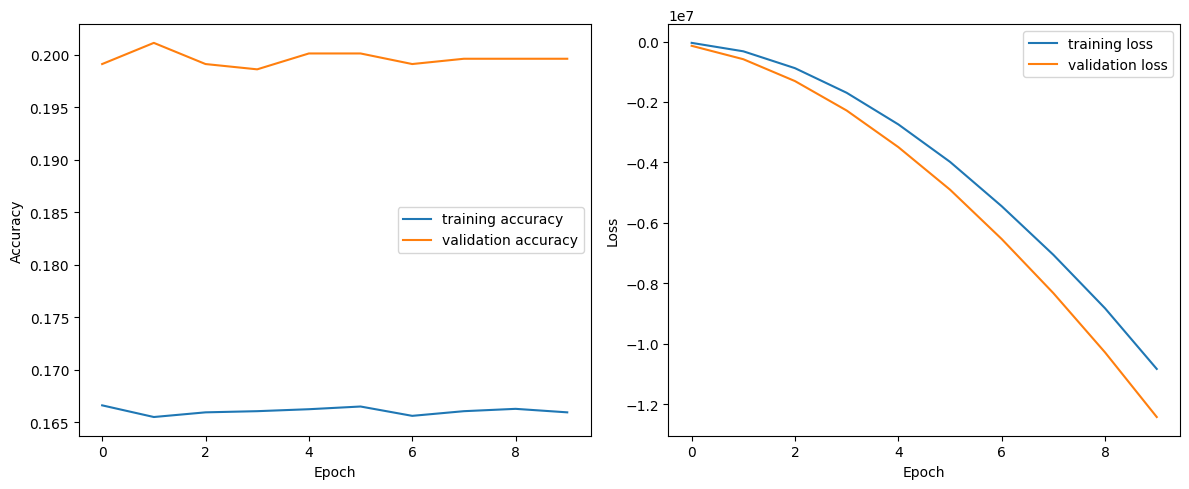

In [14]:
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
print(history_df[['accuracy', 'val_accuracy', 'loss', 'val_loss']] )


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()